In [1]:
#import modules needed
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn import linear_model
import sklearn

__Read in cleaned dataset__

In [2]:
df = df = pd.read_csv('availbikes.csv', sep=',\s+', delimiter=',')

In [3]:
df=sklearn.utils.shuffle(df)

In [4]:
df.head()

,StationNumber,available_bikes_stands,available_bikes,description,temp,temp_min,temp_max,humidity,Day,TimeOfDay
10258,69,20,19,mist,5,5,6,87,Wednesday,Afternoon
209303,9,11,13,broken clouds,11,10,12,71,Friday,Afternoon
209210,44,4,26,broken clouds,11,10,12,71,Friday,Afternoon
171242,43,25,5,few clouds,14,13,14,58,Tuesday,Afternoon
52838,76,21,17,scattered clouds,1,0,2,75,Sunday,Night


__Drop columns not needed for model__:

In [5]:
df=df.drop(['temp_min', 'temp_max', 'humidity'], axis=1)

In [6]:
df

,StationNumber,available_bikes_stands,available_bikes,description,temp,Day,TimeOfDay
10258,69,20,19,mist,5,Wednesday,Afternoon
209303,9,11,13,broken clouds,11,Friday,Afternoon
209210,44,4,26,broken clouds,11,Friday,Afternoon
171242,43,25,5,few clouds,14,Tuesday,Afternoon
52838,76,21,17,scattered clouds,1,Sunday,Night
...,...,...,...,...,...,...,...
242146,24,19,1,broken clouds,8,Monday,Night
257866,76,28,10,broken clouds,8,Tuesday,Morning
82852,112,27,3,broken clouds,10,Tuesday,Morning
69397,93,35,4,light rain,7,Monday,Morning


In [7]:
df.StationNumber.nunique()

109

__Define a function to encode data__

In [8]:
def label_enocder(data, list_cat_cols):
    '''
    Apply Label encoder to the categorical columns (list_cat_cols) in data
    
    '''
    
    #Create Label Encoder 
    for column_name in list_cat_cols:
        #Apply label encoder to each column
        data[column_name] = preprocessing.LabelEncoder().fit_transform(data[column_name])
    
    return data

__Declare Categorical Data__

In [9]:
list_le_cols=['description', 'Day', 'TimeOfDay']

In [10]:
encoded = label_enocder(df, list_le_cols)

__Seperate Dataframe into a list of df's grouped by station number__

In [11]:
dfseperated = [x for _, x in df.groupby('StationNumber')]
        

In [12]:
dfseperated[0]

,StationNumber,available_bikes_stands,available_bikes,description,temp,Day,TimeOfDay
173641,2,14,6,1,12,5,1
221578,2,20,0,0,11,2,0
29368,2,16,4,0,5,0,3
85573,2,14,6,5,9,5,0
277057,2,17,3,2,9,6,1
...,...,...,...,...,...,...,...
107680,2,15,5,9,7,4,2
132743,2,11,9,9,6,2,2
67673,2,20,0,0,5,1,3
220816,2,14,6,0,10,2,2


__Declare Target Values__

In [13]:
predict = 'available_bikes'

In [14]:
predictStands='available_bikes_stands'

__Store Station Numbers in List - Visualisation Purposes__

In [15]:
stations=[]
for index in range(len(dfseperated)):
    stations+=[dfseperated[index].StationNumber.unique().tolist()]
print(stations)

[[2], [3], [4], [5], [6], [7], [8], [9], [10], [11], [12], [13], [15], [16], [17], [18], [19], [21], [22], [23], [24], [25], [26], [27], [28], [29], [30], [31], [32], [33], [34], [36], [37], [38], [39], [40], [41], [42], [43], [44], [45], [47], [48], [49], [50], [51], [52], [53], [54], [55], [56], [57], [58], [59], [61], [62], [63], [64], [65], [66], [67], [68], [69], [71], [72], [73], [74], [75], [76], [77], [78], [79], [80], [82], [83], [84], [85], [86], [87], [88], [89], [90], [91], [92], [93], [94], [95], [96], [97], [98], [99], [100], [101], [102], [103], [104], [105], [106], [107], [108], [109], [110], [111], [112], [113], [114], [115], [116], [117]]


__KNeighbors Classifier for Bikes Available - Each station model stored in a dict__

In [16]:
import pickle
from sklearn.neighbors import KNeighborsClassifier
bikesDict={}
for index in range(len(dfseperated)):
    stationNum = (dfseperated[index].iloc[0].StationNumber)
    X = np.array(dfseperated[index].drop(['StationNumber','available_bikes'], 1))
    y = np.array(dfseperated[index][predict])
   
    x_train,x_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size = 0.3)
    model = KNeighborsClassifier(n_neighbors=5)
    model.fit(x_train, y_train)
   
    acc = model.score(x_test, y_test)
    print("Station Number:", stationNum) 
    print("Accuracy: ",acc*100)    
    bikesDict[stationNum]=model
#     filename=(str(stationNum) + "Bikes.pkl")
#     with open(filename, "wb") as f:
#         pickle.dump(model, f)


Station Number: 2
Accuracy:  72.81553398058253
Station Number: 3
Accuracy:  74.42424242424242
Station Number: 4
Accuracy:  73.05764411027569
Station Number: 5
Accuracy:  65.70203644158627
Station Number: 6
Accuracy:  78.49056603773586
Station Number: 7
Accuracy:  78.31168831168831
Station Number: 8
Accuracy:  68.17653890824621
Station Number: 9
Accuracy:  66.77181913774973
Station Number: 10
Accuracy:  73.22467986030267
Station Number: 11
Accuracy:  83.47222222222223
Station Number: 12
Accuracy:  72.6027397260274
Station Number: 13
Accuracy:  82.14765100671141
Station Number: 15
Accuracy:  78.60026917900403
Station Number: 16
Accuracy:  78.70619946091644
Station Number: 17
Accuracy:  76.35220125786164
Station Number: 18
Accuracy:  70.21517553793885
Station Number: 19
Accuracy:  62.22222222222222
Station Number: 21
Accuracy:  68.13842482100239
Station Number: 22
Accuracy:  75.46933667083854
Station Number: 23
Accuracy:  72.47058823529412
Station Number: 24
Accuracy:  73.07262569832402
S

In [17]:
bikesDict

{2: KNeighborsClassifier(),
 3: KNeighborsClassifier(),
 4: KNeighborsClassifier(),
 5: KNeighborsClassifier(),
 6: KNeighborsClassifier(),
 7: KNeighborsClassifier(),
 8: KNeighborsClassifier(),
 9: KNeighborsClassifier(),
 10: KNeighborsClassifier(),
 11: KNeighborsClassifier(),
 12: KNeighborsClassifier(),
 13: KNeighborsClassifier(),
 15: KNeighborsClassifier(),
 16: KNeighborsClassifier(),
 17: KNeighborsClassifier(),
 18: KNeighborsClassifier(),
 19: KNeighborsClassifier(),
 21: KNeighborsClassifier(),
 22: KNeighborsClassifier(),
 23: KNeighborsClassifier(),
 24: KNeighborsClassifier(),
 25: KNeighborsClassifier(),
 26: KNeighborsClassifier(),
 27: KNeighborsClassifier(),
 28: KNeighborsClassifier(),
 29: KNeighborsClassifier(),
 30: KNeighborsClassifier(),
 31: KNeighborsClassifier(),
 32: KNeighborsClassifier(),
 33: KNeighborsClassifier(),
 34: KNeighborsClassifier(),
 36: KNeighborsClassifier(),
 37: KNeighborsClassifier(),
 38: KNeighborsClassifier(),
 39: KNeighborsClassif

__KNeighbors Classifier for Stands Available - Each station model stored in a dict__

In [18]:
import pickle
StandsDict={}
for index in range(len(dfseperated)):
    stationNum = (dfseperated[index].iloc[0].StationNumber)
    X = np.array(dfseperated[index].drop(['StationNumber','available_bikes_stands'], 1))
    y = np.array(dfseperated[index][predictStands])
   
    x_train,x_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size = 0.3)
    model = KNeighborsClassifier(n_neighbors=5)
    model.fit(x_train, y_train)
    
    acc = model.score(x_test, y_test)
    print("Station Number:", stationNum)
    print("Accuracy: ",acc*100)    
    
    StandsDict[stationNum]=model
#     filename=(str(stationNum) + "Stands.pkl")
#     with open(filename, "wb") as f:
#         pickle.dump(model, f)


Station Number: 2
Accuracy:  73.7864077669903
Station Number: 3
Accuracy:  71.63636363636363
Station Number: 4
Accuracy:  72.68170426065163
Station Number: 5
Accuracy:  67.41693461950696
Station Number: 6
Accuracy:  77.9874213836478
Station Number: 7
Accuracy:  74.28571428571429
Station Number: 8
Accuracy:  67.36353077816493
Station Number: 9
Accuracy:  70.76761303890642
Station Number: 10
Accuracy:  72.29336437718277
Station Number: 11
Accuracy:  85.55555555555556
Station Number: 12
Accuracy:  73.97260273972603
Station Number: 13
Accuracy:  80.40268456375838
Station Number: 15
Accuracy:  79.94616419919247
Station Number: 16
Accuracy:  81.80592991913747
Station Number: 17
Accuracy:  76.22641509433963
Station Number: 18
Accuracy:  67.72366930917327
Station Number: 19
Accuracy:  62.116402116402114
Station Number: 21
Accuracy:  69.57040572792363
Station Number: 22
Accuracy:  77.09637046307884
Station Number: 23
Accuracy:  68.94117647058823
Station Number: 24
Accuracy:  72.9608938547486
St

In [19]:
StandsDict

{2: KNeighborsClassifier(),
 3: KNeighborsClassifier(),
 4: KNeighborsClassifier(),
 5: KNeighborsClassifier(),
 6: KNeighborsClassifier(),
 7: KNeighborsClassifier(),
 8: KNeighborsClassifier(),
 9: KNeighborsClassifier(),
 10: KNeighborsClassifier(),
 11: KNeighborsClassifier(),
 12: KNeighborsClassifier(),
 13: KNeighborsClassifier(),
 15: KNeighborsClassifier(),
 16: KNeighborsClassifier(),
 17: KNeighborsClassifier(),
 18: KNeighborsClassifier(),
 19: KNeighborsClassifier(),
 21: KNeighborsClassifier(),
 22: KNeighborsClassifier(),
 23: KNeighborsClassifier(),
 24: KNeighborsClassifier(),
 25: KNeighborsClassifier(),
 26: KNeighborsClassifier(),
 27: KNeighborsClassifier(),
 28: KNeighborsClassifier(),
 29: KNeighborsClassifier(),
 30: KNeighborsClassifier(),
 31: KNeighborsClassifier(),
 32: KNeighborsClassifier(),
 33: KNeighborsClassifier(),
 34: KNeighborsClassifier(),
 36: KNeighborsClassifier(),
 37: KNeighborsClassifier(),
 38: KNeighborsClassifier(),
 39: KNeighborsClassif

__Demonstrating Model for Station 117__

In [20]:
model_Station117=StandsDict[117]

In [21]:
predictions = model_Station117.predict(x_test)

In [22]:
for x in range(len(predictions)):
    print("Predicted: ", predictions[x], "Actual: ", y_test[x])

Predicted:  36 Actual:  36
Predicted:  39 Actual:  39
Predicted:  32 Actual:  32
Predicted:  40 Actual:  40
Predicted:  39 Actual:  39
Predicted:  33 Actual:  32
Predicted:  34 Actual:  34
Predicted:  40 Actual:  40
Predicted:  32 Actual:  32
Predicted:  34 Actual:  34
Predicted:  39 Actual:  39
Predicted:  37 Actual:  37
Predicted:  33 Actual:  33
Predicted:  40 Actual:  40
Predicted:  32 Actual:  31
Predicted:  32 Actual:  32
Predicted:  38 Actual:  40
Predicted:  37 Actual:  37
Predicted:  39 Actual:  39
Predicted:  35 Actual:  35
Predicted:  36 Actual:  36
Predicted:  38 Actual:  38
Predicted:  40 Actual:  40
Predicted:  38 Actual:  38
Predicted:  34 Actual:  34
Predicted:  36 Actual:  36
Predicted:  40 Actual:  40
Predicted:  38 Actual:  38
Predicted:  38 Actual:  38
Predicted:  34 Actual:  34
Predicted:  40 Actual:  40
Predicted:  40 Actual:  40
Predicted:  38 Actual:  38
Predicted:  36 Actual:  36
Predicted:  40 Actual:  40
Predicted:  37 Actual:  37
Predicted:  38 Actual:  38
P

Predicted:  40 Actual:  40
Predicted:  36 Actual:  36
Predicted:  35 Actual:  35
Predicted:  32 Actual:  32
Predicted:  35 Actual:  36
Predicted:  38 Actual:  38
Predicted:  40 Actual:  40
Predicted:  35 Actual:  35
Predicted:  34 Actual:  34
Predicted:  32 Actual:  32
Predicted:  34 Actual:  34
Predicted:  40 Actual:  40
Predicted:  36 Actual:  36
Predicted:  37 Actual:  37
Predicted:  39 Actual:  39
Predicted:  34 Actual:  34
Predicted:  35 Actual:  35
Predicted:  36 Actual:  36
Predicted:  38 Actual:  38
Predicted:  40 Actual:  40
Predicted:  39 Actual:  39
Predicted:  36 Actual:  36
Predicted:  40 Actual:  40
Predicted:  39 Actual:  39
Predicted:  31 Actual:  31
Predicted:  40 Actual:  40
Predicted:  35 Actual:  35
Predicted:  36 Actual:  36
Predicted:  40 Actual:  40
Predicted:  38 Actual:  38
Predicted:  38 Actual:  38
Predicted:  39 Actual:  39
Predicted:  39 Actual:  39
Predicted:  40 Actual:  40
Predicted:  40 Actual:  40
Predicted:  28 Actual:  29
Predicted:  37 Actual:  37
P

c:\users\jelly\anaconda3\envs\comp30830\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
c:\users\jelly\anaconda3\envs\comp30830\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


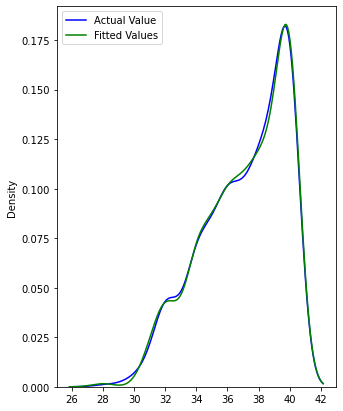

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.figure(figsize=(5, 7))
ax = sns.distplot(y_test, hist=False, color="b", label="Actual Value")
sns.distplot(predictions, hist=False, color="g", label="Fitted Values" , ax=ax)
plt.legend()
